In [1]:
# Import yfinance package
import yfinance as yf
import numpy as np

# For plotting
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-v0_8-darkgrid')

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Get Available Expiration Dates
# First, create a ticker object for a particular ticker (stock) for which you want the options chain data. 
# To do that, you need to call the Ticker method of yfinance.
# To get the expiration dates for options of a particular ticker, you need to call the options method.

# Create ticker object for Microsoft
msft = yf.Ticker('MSFT')

# Call the options on the ticker object to get the expiration dates
msft.options

('2025-08-08',
 '2025-08-15',
 '2025-08-22',
 '2025-08-29',
 '2025-09-05',
 '2025-09-12',
 '2025-09-19',
 '2025-10-17',
 '2025-11-21',
 '2025-12-19',
 '2026-01-16',
 '2026-02-20',
 '2026-03-20',
 '2026-05-15',
 '2026-06-18',
 '2026-09-18',
 '2026-12-18',
 '2027-01-15',
 '2027-06-17',
 '2027-12-17')

In [3]:
# Options Chain Data
# To download options data, you can use the option_chain method.

# Syntax:
# ticker_object.option_chain(expiration_date)

# Parameters:
# expiration_date: Expiry date in the YYYY-MM-DD format. If none, returns all options data.
# You can use calls and puts methods to get the calls and puts options chain data, respectively.

# Get options chain for specific expiration date
option_chain = msft.option_chain(date=msft.options[0])

In [4]:
# Get Microsoft calls options chain data
option_chain.calls.head()

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,MSFT250808C00250000,2025-08-04 13:46:54+00:00,250.0,285.30,0.0,0.0,0.0,0.0,8.0,8,0.00001,True,REGULAR,USD
1,MSFT250808C00260000,2025-07-31 13:52:52+00:00,260.0,281.30,0.0,0.0,0.0,0.0,NaN,0,0.00001,True,REGULAR,USD
2,MSFT250808C00300000,2025-08-04 15:57:19+00:00,300.0,235.33,0.0,0.0,0.0,0.0,10.0,0,0.00001,True,REGULAR,USD
3,MSFT250808C00320000,2025-08-04 19:00:23+00:00,320.0,216.32,0.0,0.0,0.0,0.0,1.0,0,0.00001,True,REGULAR,USD
4,MSFT250808C00330000,2025-07-30 14:32:47+00:00,330.0,184.54,0.0,0.0,0.0,0.0,2.0,0,0.00001,True,REGULAR,USD


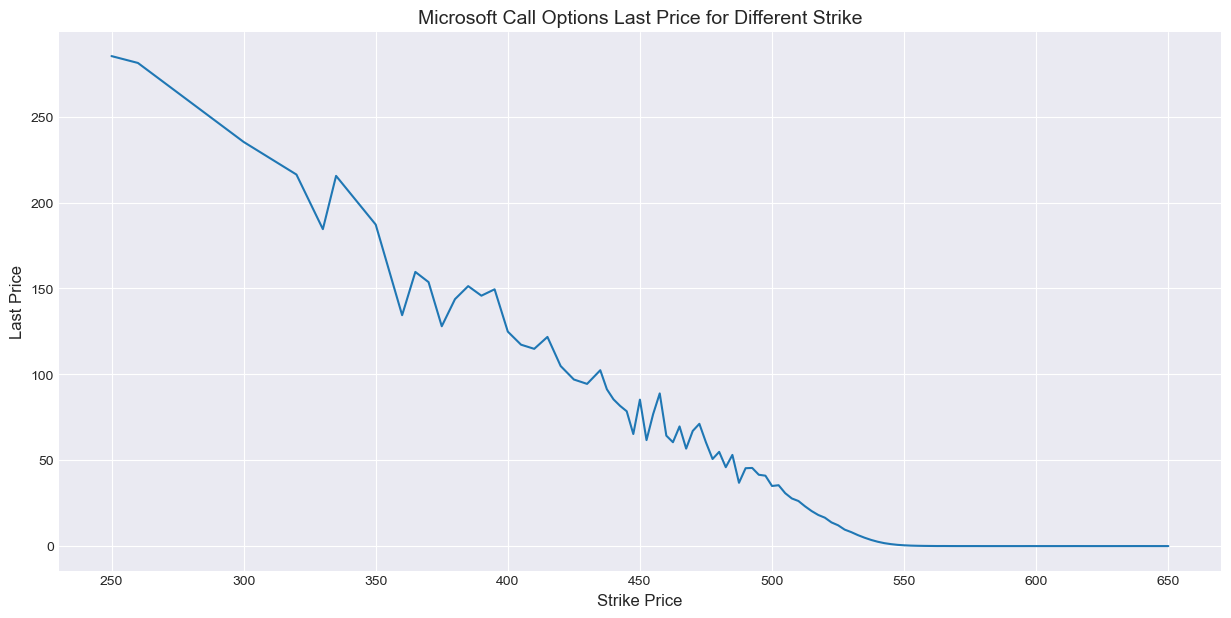

In [5]:
# Convert data to numpy arrays
call_strike_prices = np.array(option_chain.calls.strike)
call_last_prices = np.array(option_chain.calls.lastPrice)

# Plot call strike price vs call last traded price 
plt.figure(figsize=(15, 7))
plt.plot(call_strike_prices, call_last_prices)
plt.xlabel('Strike Price', fontsize=12)
plt.ylabel('Last Price', fontsize=12)
plt.title('Microsoft Call Options Last Price for Different Strike', fontsize=14)
plt.show()

In [6]:
# Get Microsoft puts options chain data
option_chain.puts.head()

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,MSFT250808P00250000,2025-08-04 16:33:27+00:00,250.0,0.01,0.0,0.0,0.0,0.0,4.0,0,0.500005,False,REGULAR,USD
1,MSFT250808P00260000,2025-07-28 18:59:39+00:00,260.0,0.01,0.0,0.0,0.0,0.0,5.0,0,0.500005,False,REGULAR,USD
2,MSFT250808P00270000,2025-07-14 14:29:00+00:00,270.0,0.02,0.0,0.0,0.0,0.0,NaN,2,0.500005,False,REGULAR,USD
3,MSFT250808P00300000,2025-07-28 13:39:39+00:00,300.0,0.02,0.0,0.0,0.0,0.0,5.0,0,0.500005,False,REGULAR,USD
4,MSFT250808P00310000,2025-07-31 13:30:00+00:00,310.0,0.04,0.0,0.0,0.0,0.0,NaN,1,0.500005,False,REGULAR,USD


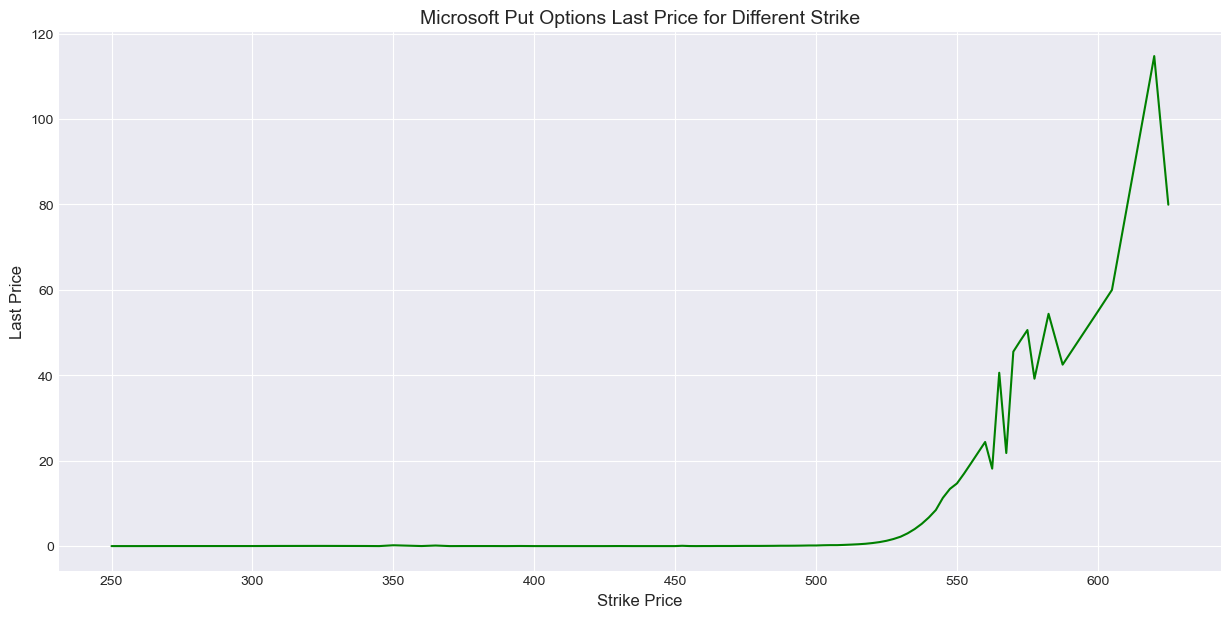

In [7]:
# Convert data to numpy arrays
put_strike_prices = np.array(option_chain.puts.strike)
put_last_prices = np.array(option_chain.puts.lastPrice)

# Plot put strike price vs put last traded price
plt.figure(figsize=(15, 7))
plt.plot(put_strike_prices, put_last_prices, color='g')
plt.xlabel('Strike Price', fontsize=12)
plt.ylabel('Last Price', fontsize=12)
plt.title('Microsoft Put Options Last Price for Different Strike', fontsize=14)
plt.show()